<a href="https://colab.research.google.com/github/ahmedelhodaiby/Numerical-Optimization-ITI/blob/main/Gradient_Descent_Implementation_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
data = np.genfromtxt("RegData.csv", delimiter=",")

#### Explore your data

In [ ]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [ ]:
x = data[:, 0]
y = data[:, 1]

#### Explore your data

In [ ]:
x

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [ ]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

<function matplotlib.pyplot.show(close=None, block=None)>

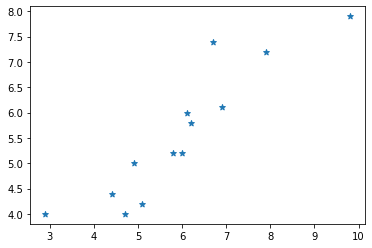

In [ ]:
plt.scatter(x, y, marker='*')
plt.show

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

![image.png](attachment:image.png)

In [ ]:
theta0 = 0
theta1 = 0
learing_rate = 0.051

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.![image.png](attachment:image.png)
#### Note: you will need to iterate through all data points

In [ ]:
hypothesis = theta0 + theta1 * x

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

In [ ]:
error = hypothesis - y
cost = ((error)**2)/len(x)

### Step4: Calculate the gradient.![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
gradient_theta0 = (1/len(x))*sum(error)
gradient_theta1 = (1/len(x))*sum((error) * x)

### Step5: Update the parameters (simultaneously).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
theta0 = theta0 - learing_rate * gradient_theta0
theta1 = theta1 - learing_rate * gradient_theta1

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.![image.png](attachment:image.png)

In [ ]:
max_iterations = 1000
costList = []
theta0 = 0
theta1 = 0
for i in range(max_iterations):
    hypothesis = theta0 + theta1 * x
    error = hypothesis - y
    cost = np.sum(((error)**2))/len(x)
    costList.append(cost)
    gradient_theta0 = (1/len(x))*sum(error)
    gradient_theta1 = (1/len(x))*sum(error * x)
    theta0 = theta0 - learing_rate * gradient_theta0
    theta1 = theta1 - learing_rate * gradient_theta1
    if((gradient_theta0**2 + gradient_theta1**2) < 1e-3):
        print("it took {} iterations".format(i))
        break

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [ ]:
hypothesis = theta0 + theta1 * x

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

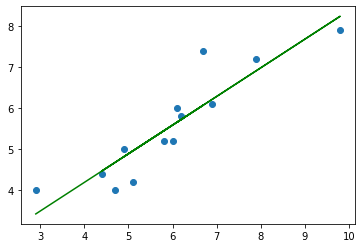

In [ ]:
plt.scatter(x, y)
yplot = theta0 + theta1 * x
plt.plot(x, yplot, 'g')

#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
r2_score(y, hypothesis)

0.8211776152244865

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

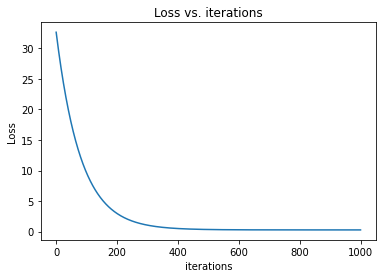

In [ ]:
plt.plot(costList)
plt.title("Loss vs. iterations")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
dataMulti = np.genfromtxt("MultipleLR.csv", delimiter=',')

In [ ]:
xtemp = dataMulti[:,:-1]
yMulti = dataMulti[:, -1]
xMulti = np.c_[np.ones((len(xtemp),1)),xtemp]
learing_rateMulti = 0.0001
print("x shape " ,xMulti.shape)
print("y shape ", yMulti.shape)

x shape  (25, 4)
y shape  (25,)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [ ]:
thetas = np.zeros(4)
losses = []
for i in range(1000):
    hypothesisMulti = xMulti @ thetas
    errorMulti = hypothesisMulti - yMulti
    lossMulti = sum((errorMulti**2))/xMulti.shape[0]
    losses.append(lossMulti)
    gradientMulti = (xMulti.T @ errorMulti)/xMulti.shape[0]
    thetas = thetas - learing_rateMulti * gradientMulti
    if(np.linalg.norm(thetas) < 1e-3):
        print("it took {} iterations".format(i))
        break

### Plot loss vs. iterations

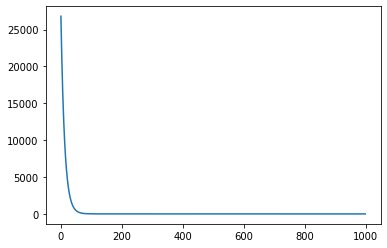

In [ ]:
plt.plot(losses)
plt.show()

#### Use R2 score to evaluate LR equation output

In [ ]:
r2_score(yMulti, hypothesisMulti)

0.9886840848834451

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library
#### Train the model (fit the model to the training data)

In [ ]:
xModel = x.reshape(-1,1)
yModel = y.reshape(-1,1)
model = LinearRegression().fit(xModel,yModel)

#### Predict y values using the trained model

In [ ]:
y_pred = model.predict(xModel)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

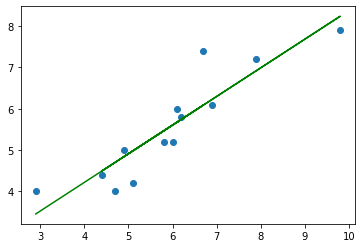

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'g')

#### Use R2 score to evaluate model output

In [ ]:
print(r2_score(yModel,y_pred))

0.8213156778363777


### Repeat for Mulivariate

In [ ]:
modelMulti = LinearRegression().fit(xMulti,yMulti)
y_predMulti = modelMulti.predict(xMulti)
print(r2_score(yMulti,y_predMulti))

0.9896615789448399
